In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import networkx as nx

#### Figure 2: Relationship between population and number of Reddit users across US states. 

In [12]:
df = pd.read_csv('data/regression_file.csv')
df.head()

,state_code,state,lat_centroid,lon_centroid,population_2010,population_2019,gdp per capita (2017),user_count,spatial_diversity_romance_0.99,social_diversity_romance_0.99,...,diversity_social_all_minstrength_1,diversity_social_all_minstrength_2,diversity_social_all_minstrength_3,diversity_social_all_minstrength_4,diversity_social_all_minstrength_5,diversity_spatial_all_minstrength_1,diversity_spatial_all_minstrength_2,diversity_spatial_all_minstrength_3,diversity_spatial_all_minstrength_4,diversity_spatial_all_minstrength_5
0,MI,Michigan,43.326618,-84.536095,9883640,9986857,42631,19226,0.010942,0.010702,...,0.782628,0.691875,0.589508,0.523624,0.468537,0.347165,0.264779,0.197451,0.160281,0.134350
1,IN,Indiana,39.849426,-86.258278,6483802,6732219,44797,8796,0.009145,0.009406,...,0.772698,0.688047,0.581975,0.513241,0.444736,0.334955,0.257399,0.191458,0.151354,0.120397
2,AL,Alabama,32.806671,-86.791130,4779736,4903185,36856,7487,0.010179,0.010759,...,0.773070,0.666816,0.583636,0.526066,0.475101,0.313184,0.233619,0.178420,0.146017,0.119721
3,MA,Massachusetts,42.230171,-71.530106,6547629,6949503,64507,20375,0.012566,0.012096,...,0.804929,0.712849,0.608988,0.545610,0.489975,0.356119,0.271862,0.204504,0.168476,0.141436
4,MO,Missouri,38.456085,-92.288368,5988927,6137428,42943,15367,0.010792,0.010656,...,0.787864,0.696975,0.599421,0.533692,0.473765,0.335388,0.254651,0.190317,0.154763,0.125958


Population 2017 not present in the csv file. Found same results using population 2019...

Slope (scaling exponent): 0.963
Intercept (log10 space): -5.817
R²: 0.7930


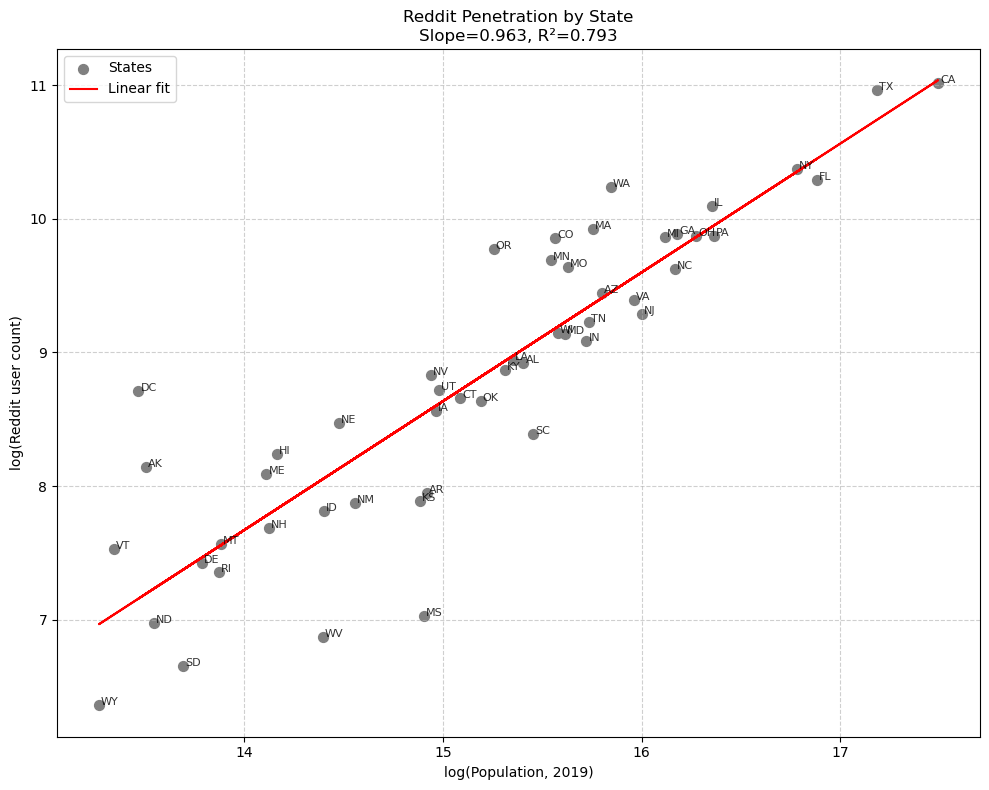

In [13]:
df = df[['state_code', 'state', 'population_2019', 'user_count']].dropna()

df['log_pop'] = np.log(df['population_2019'])
df['log_users'] = np.log(df['user_count'])

X = df[['log_pop']].values
y = df['log_users'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

df['residual'] = y - y_pred
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)

print(f"Slope (scaling exponent): {slope:.3f}")
print(f"Intercept (log10 space): {intercept:.3f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(10, 8))
plt.scatter(df['log_pop'], df['log_users'], color='gray', label='States', s=50)
plt.plot(df['log_pop'], y_pred, color='red', label='Linear fit')

for _, row in df.iterrows():
    plt.text(row['log_pop'] + 0.01, row['log_users'], row['state_code'], fontsize=8, alpha=0.8)

plt.xlabel('log(Population, 2019)')
plt.ylabel('log(Reddit user count)')
plt.title(f'Reddit Penetration by State\nSlope={slope:.3f}, R²={r2:.3f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

TO DO: Find states which # users is one st deviation more than the prediction. 

#### Table 1: Linear regressions to predict GDP per capita of US states from: 

a) population density only

b) spatial diversity computed on the full communication graph

c) spatial diversity computed on
dimension-specific communication graphs.

#### Full comunication graph

In [14]:
dim_df = pd.read_csv("data/reddit_messages_dimensions.csv", sep="|")

In [15]:
dim_df.head()

,author,time,dest_author,author_state_code,dest_state_code,support_binary_adaptive_0.5,knowledge_binary_adaptive_0.5,conflict_binary_adaptive_0.5,power_binary_adaptive_0.5,similarity_binary_adaptive_0.5,...,support_binary_adaptive_0.99,knowledge_binary_adaptive_0.99,conflict_binary_adaptive_0.99,power_binary_adaptive_0.99,similarity_binary_adaptive_0.99,fun_binary_adaptive_0.99,status_binary_adaptive_0.99,trust_binary_adaptive_0.99,identity_binary_adaptive_0.99,romance_binary_adaptive_0.99
0,allurex,1.352921e+09,allurex,MO,MO,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,dtrmp4,1.352929e+09,allurex,MI,MO,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,cthompsonguy,1.352949e+09,allurex,IN,MO,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chicken_or_chicken,1.352949e+09,allurex,AL,MO,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,thkmass,1.352963e+09,allurex,MA,MO,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
edge_weights = (
    dim_df.groupby(["author", "dest_author"])
    .size()
    .reset_index(name="weight")
)

# Threshold of 4 
edge_weights = edge_weights[edge_weights["weight"] >= 4]

In [17]:
G = nx.DiGraph()

for _, row in edge_weights.iterrows():
    G.add_edge(row["author"], row["dest_author"], weight=row["weight"])

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph has 117163 nodes and 277204 edges


#### Communication specific graphs...

In [18]:
dimensions = [
    "support", "knowledge", "conflict", "power",
    "similarity", "fun", "status", "trust",
    "identity", "romance"
]

In [21]:
graphs = {}

for dim in dimensions:
    col = f"{dim}_binary_adaptive_0.99" 
    df = dim_df[dim_df[col] == 1]

    edges = (
        df.groupby(["author", "dest_author"])
        .size()
        .reset_index(name="weight")
    )

    Gd = nx.DiGraph()
    for _, row in edges.iterrows():
        Gd.add_edge(row["author"], row["dest_author"], weight=row["weight"])

    graphs[dim] = Gd

3m 34sec..

#### Computing diversity of interactions